In [45]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import copy

In [46]:
graph_type = "barabasi_albert_graph"
num_nodes = 2000
influencers_cascade_steps = 4
num_influencers = 30
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#k_deinfluencers_ls = list(range(0, 200,5))  # Different values of k to test
general_cascade_steps = 3
num_avg_runs = 5

In [47]:
print(k_deinfluencers_ls)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [48]:
G = nx.barabasi_albert_graph(num_nodes, 2)
model = ef.run_influence_cascade(G, num_influencers=num_influencers, steps=influencers_cascade_steps, selection_method='random')
num_edges = G.number_of_edges()

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1445
Number of deinfluenced nodes: 0
Number of susceptible nodes: 555
influencer {642, 515, 266, 268, 1420, 276, 545, 1406, 687, 48, 815, 945, 1839, 559, 51, 829, 1341, 189, 66, 1478, 1350, 715, 1355, 463, 850, 468, 86, 887, 379, 1662}


In [49]:
deinfluencers_list = ef.select_deinfluencers(k_deinfluencers_ls, model_fixed_influencers)
results = ef.average_results(deinfluencers_list, model_fixed_influencers, num_runs=num_avg_runs, steps=general_cascade_steps)

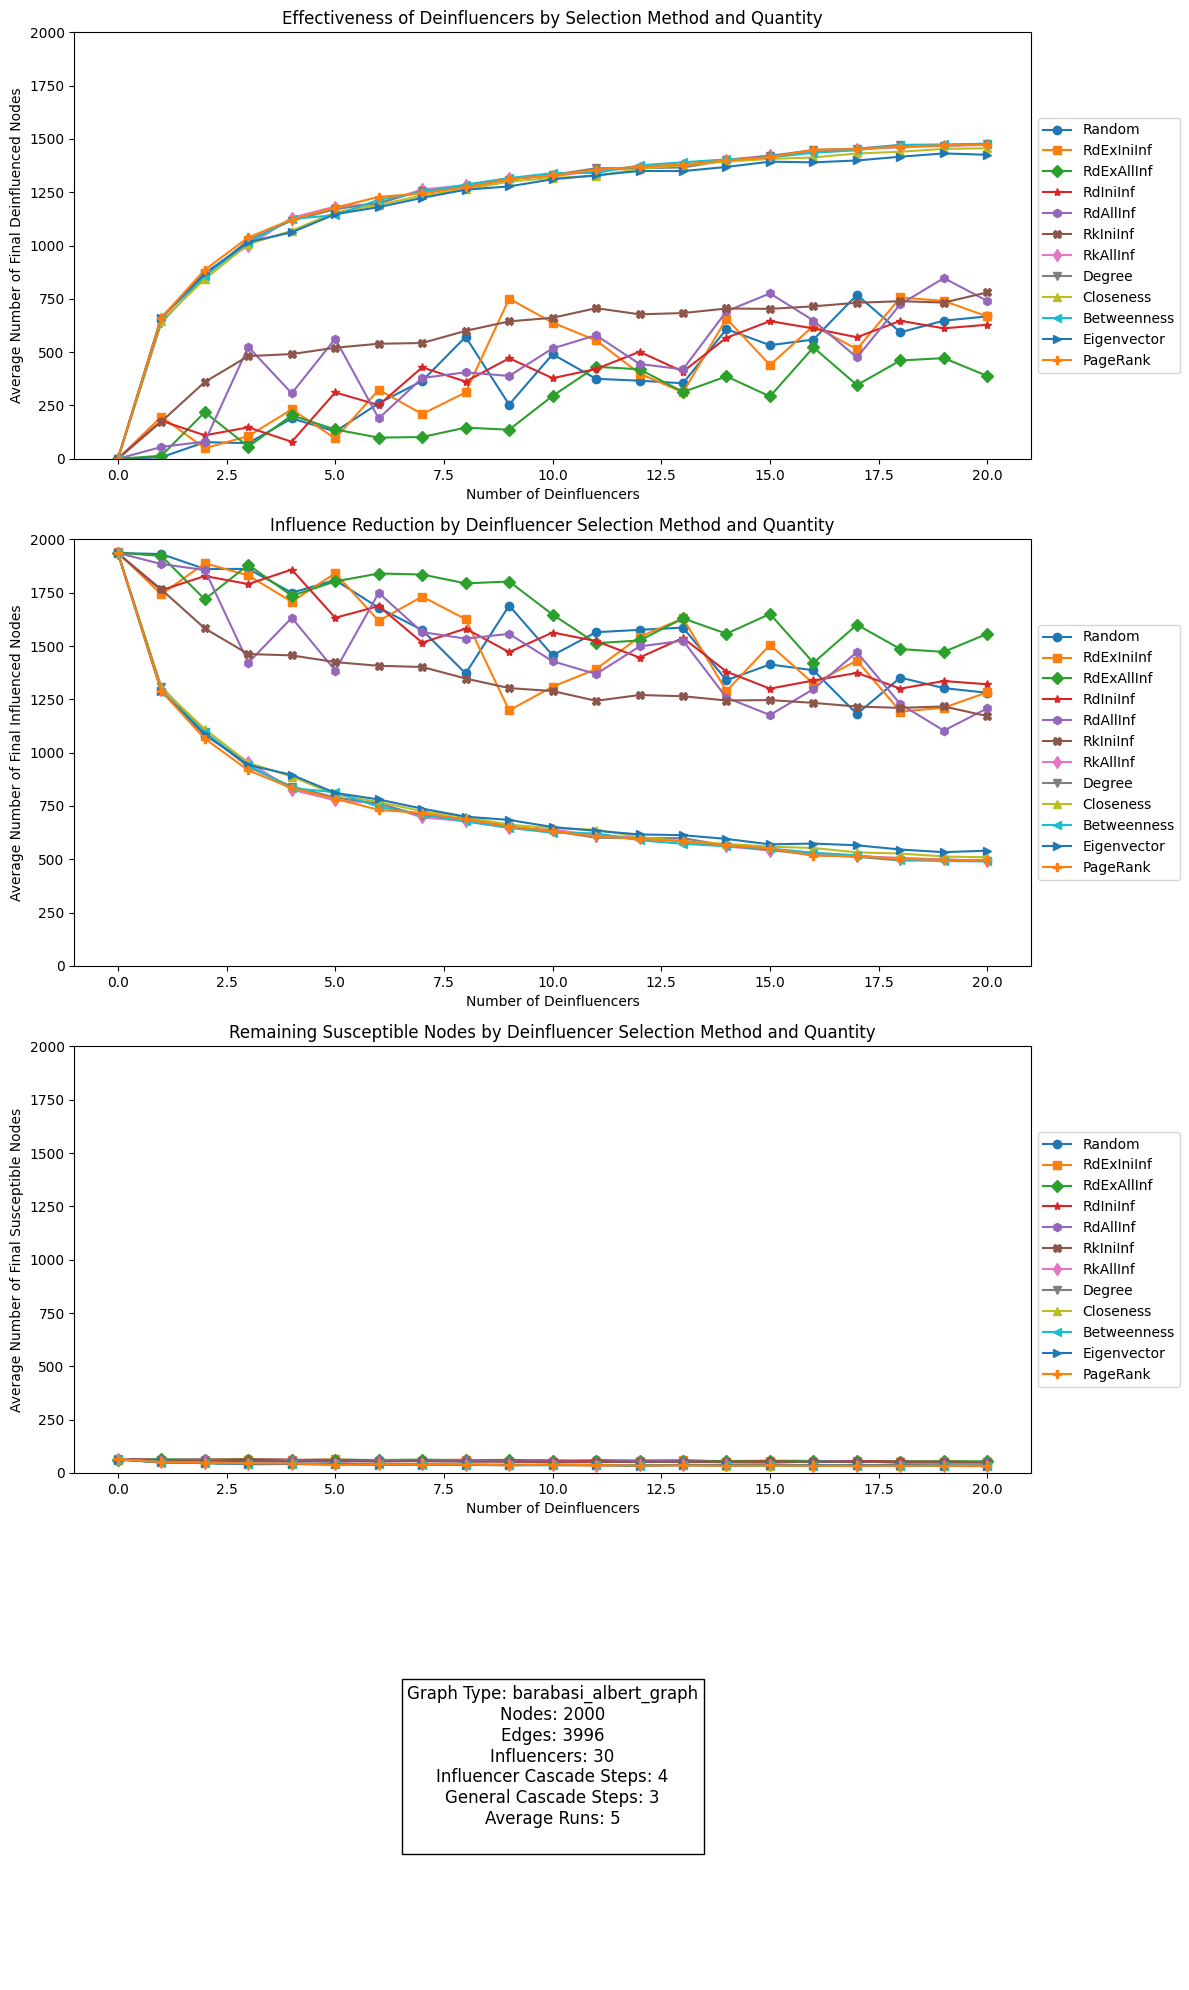

In [51]:
ef.plot_deinfluencer_results_exp3(results, G, graph_type, num_nodes, num_edges, num_influencers, influencers_cascade_steps, general_cascade_steps, num_avg_runs)